# Memoization

## Regular recursive Fibonacci function

In [1]:
def fib(n):
    if n==0 or n==1: return 1
    else: return fib(n-1)+fib(n-2)

## Definition of caching decorator 

In [2]:
def memoize(function):
    cache = {}
    def decorated_function(*args):
        if args in cache:
            return cache[args]
        else:
            retval = function(*args)
            cache[args] = retval
            return retval
    return decorated_function

## Decorated recursive Fibonacci function

In [3]:
@memoize
def cached_fib(n):
    if n==0 or n==1: return 1
    else: return cached_fib(n-1)+cached_fib(n-2)

## Comparing functions runtime

In [4]:
import timeit

t1 = timeit.Timer("fib(35)", "from __main__ import fib")
print(t1.timeit(1))
t2 = timeit.Timer("cached_fib(35)", "from __main__ import cached_fib")
print(t2.timeit(1))

5.860329002907193
3.8488875431674785e-05


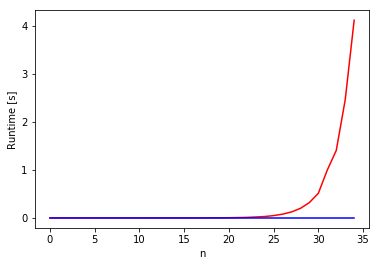

In [5]:
import matplotlib.pyplot as plt

t1 = []
t2 = []
max_it = 35
t = range(0, max_it)
for i in t:
    t11 = timeit.Timer("fib(%s)" % i, "from __main__ import fib")
    t1.append(t11.timeit(1))
    t12 = timeit.Timer("cached_fib(%s)" % i, "from __main__ import cached_fib")
    t2.append(t12.timeit(1))
    

plt.plot(t,t1,'r',t,t2,'b')
plt.ylabel('Runtime [s]')
plt.xlabel('n')
plt.show()